# ENRIQUECIMIENTO DEL DATO CON DATASETS ADICIONALES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

import seaborn as sns
import geopandas as gpd
import warnings
warnings.filterwarnings('ignore')

# Carga de los datasets y primeras visualizaciones

In [2]:
# Carga del dataset principal
location = "resources/"
df = pd.read_csv(f"./{location}DatosViviendas1.csv", delimiter=";", header=0, encoding='latin-1')

# Carga de los datasets a utilizar en el enriquecimiento
euribor = pd.read_csv(f"./{location}Euribor.csv", delimiter=",", header=0, encoding='latin-1')
tipo_interes = pd.read_csv(f"./{location}Tipo_de_interes.csv", delimiter=";", header=0, encoding='latin-1')
paro = pd.read_csv(f"./{location}Paro.csv", delimiter=";", header=0, encoding='latin-1')
hipotecas = pd.read_csv(f"./{location}Hipotecas.csv", delimiter=";", header=0, encoding='latin-1')
ipc = pd.read_csv(f"./{location}IPC.csv", delimiter=";", header=0, encoding='latin-1')

In [3]:
# Carga del dataset principal
location = "resources/"
df = pd.read_csv(f"./{location}DatosViviendas1.csv", delimiter=";", header=0, encoding='latin-1')

print(df.columns)

Index(['Unnamed: 0', 'Fecha', 'ID', 'URL', 'ID_Cliente', 'URL_Cliente',
       'Inmueble', 'Caracteristicas', 'Habitaciones', 'Aseos', 'Terraza',
       'Piscina', 'Garaje', 'Precio', 'Metros', 'Relacion', 'CodigoPostal',
       'Latitud', 'Longitud', 'Precision', 'CMUN', 'CPRO', 'CCA', 'CUDIS',
       'NPRO', 'NCA', 'NMUN'],
      dtype='object')


# 1. Viviendas

In [4]:
print(df.shape)
df.head(10)

(954157, 27)


,Unnamed: 0,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,...,Latitud,Longitud,Precision,CMUN,CPRO,CCA,CUDIS,NPRO,NCA,NMUN
0,1,28/01/2022,162446518.0,https://www.fotocasa.es/es/comprar/vivienda/sa...,"9,20276E+12",https://www.fotocasa.es/es/comprar/inmuebles/e...,Flat,SemidetachedHouse,3.0,1.0,...,3.647.855,-6.195.769,1.0,31.0,11.0,1.0,1103101.0,Cádiz,Andalucía,San Fernando
1,2,28/01/2022,162446527.0,https://www.fotocasa.es/es/comprar/vivienda/ca...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-tecnoc...,Flat,Attic,3.0,1.0,...,3.651.618,-6.272.779,0.0,12.0,11.0,1.0,1101209.0,Cádiz,Andalucía,Cádiz
2,3,28/01/2022,162446511.0,https://www.fotocasa.es/es/comprar/vivienda/mo...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-alquic...,Flat,House_Chalet,3.0,3.0,...,3.712.598,-355.286,0.0,134.0,18.0,1.0,1813402.0,Granada,Andalucía,Monachil
3,4,28/01/2022,162446508.0,https://www.fotocasa.es/es/comprar/vivienda/el...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-duran-...,Flat,Flat,1.0,1.0,...,3.670.038,-2.788.239,0.0,902.0,4.0,1.0,490201.0,Almería,Andalucía,"Ejido, El"
4,5,28/01/2022,162446503.0,https://www.fotocasa.es/es/comprar/vivienda/al...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-inmobi...,Flat,CountryHouse,4.0,2.0,...,371.995,-4.662.323,0.0,1.0,29.0,1.0,2900101.0,Málaga,Andalucía,Alameda
5,6,28/01/2022,162446491.0,https://www.fotocasa.es/es/comprar/vivienda/ar...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-alquic...,Flat,House_Chalet,4.0,3.0,...,3.714.406,-3.621.301,0.0,21.0,18.0,1.0,1802101.0,Granada,Andalucía,Armilla
6,7,28/01/2022,162446486.0,https://www.fotocasa.es/es/comprar/vivienda/al...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-alquic...,Flat,House_Chalet,7.0,4.0,...,3.722.585,-3.655.629,0.0,3.0,18.0,1.0,1800301.0,Granada,Andalucía,Albolote
7,8,28/01/2022,162446482.0,https://www.fotocasa.es/es/comprar/vivienda/pe...,"5,0018E+11",https://www.fotocasa.es/es/inmobiliaria-inmoca...,Flat,House_Chalet,5.0,5.0,...,3.723.016,-3.630.378,0.0,153.0,18.0,1.0,1815301.0,Granada,Andalucía,Peligros
8,9,28/01/2022,162446478.0,https://www.fotocasa.es/es/comprar/vivienda/al...,"9,20277E+12",https://www.fotocasa.es/es/inmobiliaria-alquic...,Flat,House_Chalet,3.0,1.0,...,3.722.965,-3.660.552,0.0,3.0,18.0,1.0,1800301.0,Granada,Andalucía,Albolote
9,10,28/01/2022,162446476.0,https://www.fotocasa.es/es/comprar/vivienda/pa...,"5,0018E+11",https://www.fotocasa.es/es/inmobiliaria-inmoca...,Flat,Flat,3.0,1.0,...,3.702.485,-3.627.549,0.0,150.0,18.0,1.0,1815002.0,Granada,Andalucía,Padul


In [5]:
dfm = df[df["NPRO"] == "Madrid"]
print("Comunidad de Madrid: ", dfm.shape)

Comunidad de Madrid:  (66390, 27)


In [6]:
dfm['Fecha'] = pd.to_datetime(dfm['Fecha'], dayfirst=True).dt.strftime('%Y-%m-%d')
dfm['Periodo'] = dfm['Fecha'].str[:7]
print(dfm["Periodo"].min(), dfm["Periodo"].max())

2021-09 2022-01


In [7]:
print(dfm["Fecha"].min(), dfm["Fecha"].max())

2021-09-07 2022-01-28


# 2. Euribor

In [8]:
euribor

,date,conf,status1,s1
0,1994-01-31,NaN,Normal value,6.3400
1,1994-02-28,NaN,Normal value,6.4200
2,1994-03-31,NaN,Normal value,6.5500
3,1994-04-30,NaN,Normal value,6.4600
4,1994-05-31,NaN,Normal value,6.2500
...,...,...,...,...
352,2023-05-31,NaN,Normal value,3.8618
353,2023-06-30,NaN,Normal value,4.0073
354,2023-07-31,NaN,Normal value,4.1490
355,2023-08-31,NaN,Normal value,4.0730


In [9]:
euribor['Periodo'] = euribor['date'].str[:7]
dfm = dfm.merge(euribor[['Periodo', 's1']], on='Periodo', how='left')
dfm.rename(columns={'s1': 'euribor'}, inplace=True)

# 3. Hipotecas

In [10]:
hipotecas = hipotecas[hipotecas["ï»¿Provincias"] == "28 Madrid"]
hipotecas = hipotecas[hipotecas['Entidad que concede el prÃ©stamo'] == "Total"]
hipotecas["Periodo"] = hipotecas["Periodo"].str.replace("M", "-")
numero_hipotecas = hipotecas[hipotecas['NÃºmero e importe'] == "NÃºmero de hipotecas"]

In [11]:
dfm = dfm.merge(numero_hipotecas[['Periodo', 'Total']], on='Periodo', how='left')
dfm.rename(columns={'Total': 'numero_hipotecas'}, inplace=True)

# 4. IPC

In [12]:
ipc = ipc[ipc["Provincias"] == "28 Madrid"]
ipc["Periodo"] = ipc["Periodo"].str.replace("M", "-")
ipc

,Totales Territoriales,Comunidades y Ciudades Autónomas,Provincias,Grupos ECOICOP: Nivel 1,Grupos ECOICOP: Nivel 2,Grupos ECOICOP: Nivel 3,Tipo de dato,Periodo,Total
0,Nacional,"13 Madrid, Comunidad de",28 Madrid,Índice general,NaN,NaN,Variación anual,2022-02,"6,9"
1,Nacional,"13 Madrid, Comunidad de",28 Madrid,Índice general,NaN,NaN,Variación anual,2022-01,"5,6"
2,Nacional,"13 Madrid, Comunidad de",28 Madrid,Índice general,NaN,NaN,Variación anual,2021-12,"6,2"
3,Nacional,"13 Madrid, Comunidad de",28 Madrid,Índice general,NaN,NaN,Variación anual,2021-11,"5,3"
4,Nacional,"13 Madrid, Comunidad de",28 Madrid,Índice general,NaN,NaN,Variación anual,2021-10,"5,1"
5,Nacional,"13 Madrid, Comunidad de",28 Madrid,Índice general,NaN,NaN,Variación anual,2021-09,"3,6"
6,Nacional,"13 Madrid, Comunidad de",28 Madrid,Índice general,NaN,NaN,Variación anual,2021-08,"3,0"


In [13]:
dfm = dfm.merge(ipc[['Periodo', 'Total']], on='Periodo', how='left')
dfm.rename(columns={'Total': 'ipc'}, inplace=True)

# 5. Tipo de interes

In [14]:
tipo_interes = tipo_interes[tipo_interes['ï»¿Tipo de interÃ©s'] == "Total"]
tipo_interes = tipo_interes[tipo_interes['Naturaleza de la finca'] == "Viviendas"]
tipo_interes["Periodo"] = tipo_interes["Periodo"].str.replace("M", "-")
tipo_interes

,ï»¿Tipo de interÃ©s,Naturaleza de la finca,Periodo,Total
175,Total,Viviendas,2023-07,"3,24"
176,Total,Viviendas,2023-06,"3,19"
177,Total,Viviendas,2023-05,"3,15"
178,Total,Viviendas,2023-04,"3,09"
179,Total,Viviendas,2023-03,"2,99"
...,...,...,...,...
345,Total,Viviendas,2009-05,"4,38"
346,Total,Viviendas,2009-04,"4,50"
347,Total,Viviendas,2009-03,"4,89"
348,Total,Viviendas,2009-02,"5,20"


In [15]:
dfm = dfm.merge(tipo_interes[['Periodo', 'Total']], on='Periodo', how='left')
dfm.rename(columns={'Total': 'tipo_interes'}, inplace=True)

In [16]:
dfm

,Unnamed: 0,Fecha,ID,URL,ID_Cliente,URL_Cliente,Inmueble,Caracteristicas,Habitaciones,Aseos,...,CCA,CUDIS,NPRO,NCA,NMUN,Periodo,euribor,numero_hipotecas,ipc,tipo_interes
0,5851,2022-01-28,162446683.0,https://www.fotocasa.es/es/comprar/vivienda/ar...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-100-ho...,Flat,Flat,3.0,1.0,...,13.0,2801302.0,Madrid,Comunidad de Madrid,Aranjuez,2022-01,-0.4767,8.000,"5,6","1,85"
1,5852,2022-01-28,162446675.0,https://www.fotocasa.es/es/comprar/vivienda/al...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-exclus...,Flat,Flat,3.0,1.0,...,13.0,2800501.0,Madrid,Comunidad de Madrid,Alcalá de Henares,2022-01,-0.4767,8.000,"5,6","1,85"
2,5853,2022-01-28,162446624.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,"6,0014E+11",https://www.fotocasa.es/es/inmobiliaria-remax-...,Flat,Flat,3.0,2.0,...,13.0,2807906.0,Madrid,Comunidad de Madrid,Madrid,2022-01,-0.4767,8.000,"5,6","1,85"
3,5854,2022-01-28,162446604.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-eduard...,Flat,Flat,4.0,2.0,...,13.0,2807910.0,Madrid,Comunidad de Madrid,Madrid,2022-01,-0.4767,8.000,"5,6","1,85"
4,5855,2022-01-28,162446580.0,https://www.fotocasa.es/es/comprar/vivienda/ma...,"9,20276E+12",https://www.fotocasa.es/es/inmobiliaria-redpis...,Flat,Flat,3.0,1.0,...,13.0,2807912.0,Madrid,Comunidad de Madrid,Madrid,2022-01,-0.4767,8.000,"5,6","1,85"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66385,3059512,2021-09-07,158077685.0,https://www.fotocasa.es/es/alquiler/vivienda/a...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-ideali...,Flat,Apartment,1.0,1.0,...,13.0,2801304.0,Madrid,Comunidad de Madrid,Aranjuez,2021-09,-0.4923,10.480,"3,6","1,84"
66386,3059712,2021-09-07,158687522.0,https://www.fotocasa.es/es/alquiler/vivienda/a...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-pisos-...,Flat,Flat,2.0,1.0,...,13.0,2801301.0,Madrid,Comunidad de Madrid,Aranjuez,2021-09,-0.4923,10.480,"3,6","1,84"
66387,3061513,2021-09-07,161172147.0,https://www.fotocasa.es/es/alquiler/vivienda/a...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-desire...,Flat,Apartment,1.0,1.0,...,13.0,2801303.0,Madrid,Comunidad de Madrid,Aranjuez,2021-09,-0.4923,10.480,"3,6","1,84"
66388,3061713,2021-09-07,161185330.0,https://www.fotocasa.es/es/alquiler/vivienda/a...,"9,20275E+12",https://www.fotocasa.es/es/inmobiliaria-partic...,Flat,Flat,1.0,1.0,...,13.0,2801304.0,Madrid,Comunidad de Madrid,Aranjuez,2021-09,-0.4923,10.480,"3,6","1,84"


# 6. Paro

In [17]:
paro = paro[paro["Comunidades y Ciudades Autónomas"] == "13 Madrid, Comunidad de"]
paro = paro[paro["Edad"] == "De 25 a 54 años"]
paro

,Sexo,Comunidades y Ciudades Autónomas,Edad,Periodo,Total
15,Ambos sexos,"13 Madrid, Comunidad de",De 25 a 54 años,2022T1,"10,68"
16,Ambos sexos,"13 Madrid, Comunidad de",De 25 a 54 años,2021T4,"9,01"
17,Ambos sexos,"13 Madrid, Comunidad de",De 25 a 54 años,2021T3,"9,98"


In [18]:
def trimestre_a_mes(periodo):
    año, trimestre = periodo.split('T')
    if trimestre == '1':
        return f"{año}-01"
    elif trimestre == '3':
        return f"{año}-09"
    elif trimestre == '4':
        return [f"{año}-10", f"{año}-11", f"{año}-12"]

paro_expandido = []
for _, row in paro.iterrows():
    meses = trimestre_a_mes(row['Periodo'])
    if isinstance(meses, list):
        for mes in meses:
            paro_expandido.append({'Periodo': mes, 'Total': row['Total']})
    else:
        paro_expandido.append({'Periodo': meses, 'Total': row['Total']})

paro_expandido_df = pd.DataFrame(paro_expandido)

In [19]:
dfm = dfm.merge(paro_expandido_df[['Periodo', 'Total']], on='Periodo', how='left')
dfm.rename(columns={'Total': 'paro'}, inplace=True)
dfm.drop('Periodo', axis=1, inplace=True)

# LIMPIEZA DEL DATO

Acto seguido, vamos a convertir a formato numérico todas aquellas columnas que sean convertibles y puedan ofrecernos valor en nuesras futuras predicciones.

In [20]:
# Convertimos a numérico si es necesario
columnas_para_convertir = ['Relacion', 'CodigoPostal', 'paro', 'tipo_interes', 'ipc', 'numero_hipotecas']
for columna in columnas_para_convertir:
    dfm[columna] = dfm[columna].astype(str)
    dfm[columna] = dfm[columna].str.replace(",", ".")
    dfm[columna] = pd.to_numeric(dfm[columna], errors='coerce')

Convertimos el formato fecha a un formato numérico en las variables "Año", "Mes" y "Dia", de forma que estas variables puedan ser fácilmente utilizadas a la hora de predecir el precio.

In [21]:
dfm['Fecha'] = pd.to_datetime(dfm['Fecha'])

In [22]:
dfm['Año'] = dfm['Fecha'].dt.year
dfm['Mes'] = dfm['Fecha'].dt.month
dfm['Dia'] = dfm['Fecha'].dt.day

Ajustamos la variable "Relacion" para evitar posibles errores.

In [23]:
dfm['Relacion'] = dfm['Precio'] / dfm["Metros"]

Corregimos los valores de Latitud y Longitud teniendo en cuenta que los valores reales de la Comunidad de Madrid oscilan entre -3 y -4.5 aproximadamente para la Longitud, y entre 39.9 y 41.1 aproximadamente para la Latitud.

In [24]:
print('Latitud minima: ', dfm['Latitud'].min(), 'Latitud maxima: ', dfm['Latitud'].max())
print('Longitud minima: ', dfm['Longitud'].min(), 'Longitud maxima: ', dfm['Longitud'].max())

Latitud minima:  3.999.259 Latitud maxima:  411.308
Longitud minima:  -3.081.048 Longitud maxima:  -452.444


In [25]:
def corregir_ubicacion(col):
    col = str(col).replace('.', '')
    return col[:2] + '.' + col[2:]

def ubicacion(df, cols):
    for columna in cols:
        #Corregimos el formato
        df[columna] = df[columna].apply(corregir_ubicacion)
        
        # Convertimos a valores numéricos
        df[columna] = dfm[columna].astype(str)
        df[columna] = pd.to_numeric(df[columna], errors='coerce')
        
        print(f'{columna} minima: {df[columna].min()},\n {columna} maxima: {df[columna].max()}\n')
        
    return df

In [26]:
cols = ['Latitud', 'Longitud']

d = ubicacion(dfm, cols)

Latitud minima: 39.99259,
 Latitud maxima: 41.13136

Longitud minima: -4.52444,
 Longitud maxima: -3.081048



In [27]:
d.isnull().sum()

Unnamed: 0             0
Fecha                  0
ID                     0
URL                    0
ID_Cliente             0
URL_Cliente            0
Inmueble               0
Caracteristicas        6
Habitaciones        2069
Aseos               1183
Terraza                0
Piscina                0
Garaje                 0
Precio               395
Metros               257
Relacion             598
CodigoPostal           1
Latitud                0
Longitud               0
Precision              0
CMUN                   0
CPRO                   0
CCA                    0
CUDIS                  0
NPRO                   0
NCA                    0
NMUN                   0
euribor                0
numero_hipotecas       0
ipc                    0
tipo_interes           0
paro                   0
Año                    0
Mes                    0
Dia                    0
dtype: int64

Identificamos y eliminamos valores nulos y atípicos.

In [28]:
def visualizar_nulos_atipicos(df):
    # Identificamos valores nulos
    valores_nulos = df.isnull().sum()

    # Función para identificar valores atípicos
    def identificar_atipicos(df, columna, a=0.01):
        Q1 = df[columna].quantile(a)
        Q3 = df[columna].quantile(1-a)
        IQR = Q3 - Q1
        limite_inferior = Q1 - 1.5 * IQR
        limite_superior = Q3 + 1.5 * IQR

        atipicos = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
        return atipicos[columna]

    print("Valores Nulos por Columna:\n", valores_nulos)
    print("\nValores Atípicos en 'Habitaciones':\n", identificar_atipicos(df, 'Habitaciones'))
    print("\nValores Atípicos en 'Aseos':\n", identificar_atipicos(df, 'Aseos'))
    print("\nValores Atípicos en 'Metros':\n", identificar_atipicos(df, 'Metros'))
    print("\nValores Atípicos en 'Relacion':\n", identificar_atipicos(df, 'Relacion'))
    print("\nValores Atípicos en 'Precios':\n", identificar_atipicos(df, 'Precio'))

In [29]:
visualizar_nulos_atipicos(dfm)

Valores Nulos por Columna:
 Unnamed: 0             0
Fecha                  0
ID                     0
URL                    0
ID_Cliente             0
URL_Cliente            0
Inmueble               0
Caracteristicas        6
Habitaciones        2069
Aseos               1183
Terraza                0
Piscina                0
Garaje                 0
Precio               395
Metros               257
Relacion             598
CodigoPostal           1
Latitud                0
Longitud               0
Precision              0
CMUN                   0
CPRO                   0
CCA                    0
CUDIS                  0
NPRO                   0
NCA                    0
NMUN                   0
euribor                0
numero_hipotecas       0
ipc                    0
tipo_interes           0
paro                   0
Año                    0
Mes                    0
Dia                    0
dtype: int64

Valores Atípicos en 'Habitaciones':
 1728     153.0
4228      20.0
15051     32.0
1

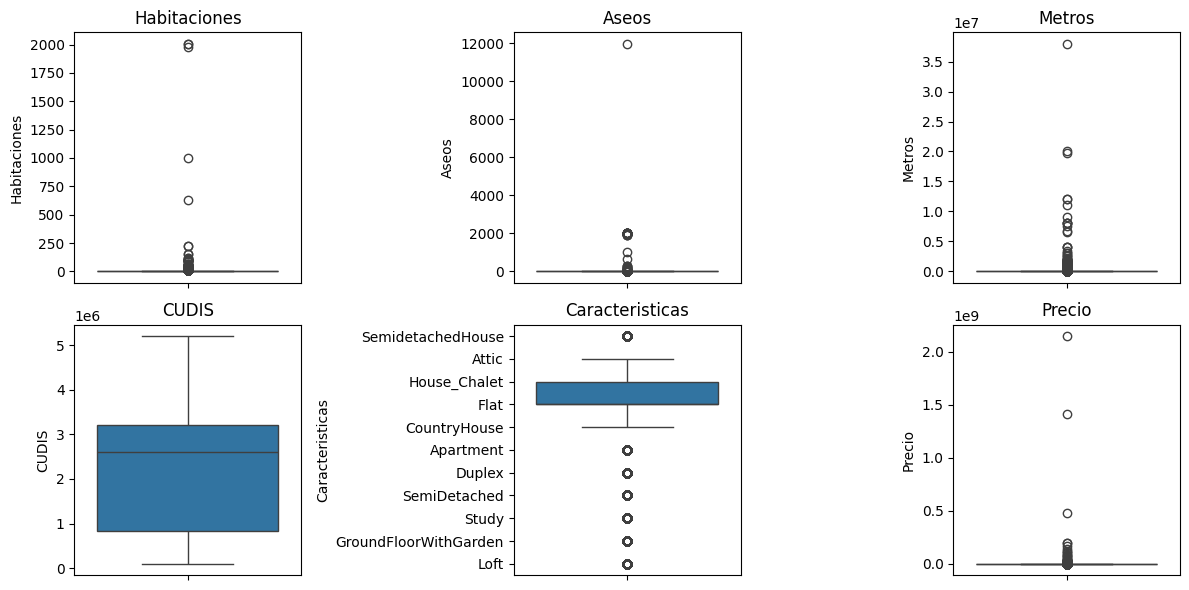

In [30]:
# Definimos el número de filas
n_filas = 2

# Seleccionamos algunas variables clave para visualización
columnas = ['Habitaciones', 'Aseos', 'Metros', 'CUDIS', 'Caracteristicas', 'Precio']

# Creamos una figura y un conjunto de subgráficos
plt.figure(figsize=(12, 6))

for i, columna in enumerate(columnas):
    plt.subplot(n_filas, round(len(columnas)/2), i+1)
    sns.boxplot(y=df[columna])
    plt.title(columna)

plt.tight_layout()  # Ajusta automáticamente los subgráficos
plt.show()

Como se puede observar, existe una gran cantidad tanto de valores nulos como de valores atípicos. Es por esto que vamos a definir una serie de métodos que nos ayuden a llevar a cabo una limpieza extensiva de los datos, para prepararlos antes de aplicar las técnicas de analítica avanzada.

In [31]:
# Función para eliminar valores atípicos
def eliminar_atipicos(df, columna, a=0.01):
    Q1 = df[columna].quantile(a)
    Q3 = df[columna].quantile(1-a)
    IQR = Q3 - Q1
    limite_inferior = Q1
    limite_superior = Q3 + 0.5 * IQR

    return (df[columna] >= limite_inferior) & (df[columna] <= limite_superior)

def eliminar_nulos_atipicos(df):
    # Eliminar filas con valores nulos
    df = df.dropna()

    # Eliminar valores atípicos para 'Habitaciones', 'Aseos', y 'Metros'
    df = df[eliminar_atipicos(df, 'Habitaciones') & eliminar_atipicos(df, 'Aseos') 
            & eliminar_atipicos(df, 'Metros') & eliminar_atipicos(df, 'Precio')]
    
    return df

In [32]:
dfm = eliminar_nulos_atipicos(dfm)

Convertimos los valores de la variable "Caracteristicas" a enteros que los representen y que puedan ser interpretados por nuestros futuros modelos predictivos.

In [33]:
valores_unicos_caracteristicas = dfm['Caracteristicas'].unique()

# Normalizamos valores específicos para que tengan la misma representación
valores_normalizados = []
for valor in valores_unicos_caracteristicas:
    if valor in ['SemiDetached', 'SemidetachedHouse']:
        valores_normalizados.append('SemiDetached')
    else:
        valores_normalizados.append(valor)

valores_unicos_normalizados = list(set(valores_normalizados))

# Mapeamos con valores normalizados
mapeo_numerico = {valor: indice + 1 for indice, valor in enumerate(valores_unicos_normalizados)}
mapeo_numerico['SemidetachedHouse'] = mapeo_numerico['SemiDetached']

# Aplicamos el mapeo al dataframe
dfm['Caracteristicas'] = dfm['Caracteristicas'].map(mapeo_numerico)

print(mapeo_numerico)

{'House_Chalet': 1, 'GroundFloorWithGarden': 2, 'Flat': 3, 'Attic': 4, 'Duplex': 5, 'SemiDetached': 6, 'CountryHouse': 7, 'Loft': 8, 'Apartment': 9, 'Study': 10, 'SemidetachedHouse': 6}


In [34]:
columnas_a_convertir = ['Caracteristicas', 'Habitaciones', 'Aseos', 'Terraza', 'Piscina', 'Garaje', 'CUDIS']

# Convertimos cada columna a int64
for columna in columnas_a_convertir:
    dfm[columna] = dfm[columna].astype('int64')

In [35]:
df = dfm[['Año', 'Mes', 'Dia', 'Caracteristicas', 'Habitaciones', 'Aseos', 'Terraza', 'Piscina', 'Garaje', 'CUDIS', 
          'Latitud', 'Longitud', 'Metros', 'Relacion', 'euribor', 'numero_hipotecas', 'ipc', 'tipo_interes', 'paro', 'Precio']]

De forma adicional, hacemos una comprobación del formato de dichas variables para asegurarnos de que es el correcto.

Una vez tenemos el dato listo, vamos a realizar un último análisis sobre las variables "Relacion" y "Precio" con el objetivo de buscar valores anómalos. Este análisis se fundamenta en que el portal "Fotocasa", del que provienen los datos, ofrece ofertas tanto de compra como de alquiler de viviendas, mientras que nuestro trabajo se centra únicamente en el estudio del valor de compra. Por ello intentaremos identificar posibles valores que hagan referencia a ofertas de alquiler y trataremos de definir un criterio para excluir aquellos valores que hagan referencia a ofertas de alquiler.

In [36]:
def cota(df, col, li=0, ls=5000):
    c = df[df[col] > li]
    c = c[df[col] < ls]
    print(f'{col}: {c.shape}')
    plt.figure(figsize=(10, 6))
    sns.histplot(c[col], kde=True)
    plt.title(f'Distribución de {li} < {col} < {ls}')
    plt.ylabel('Frecuencia')
    plt.xlabel(col)
    plt.show()

Relacion: (30358, 20)


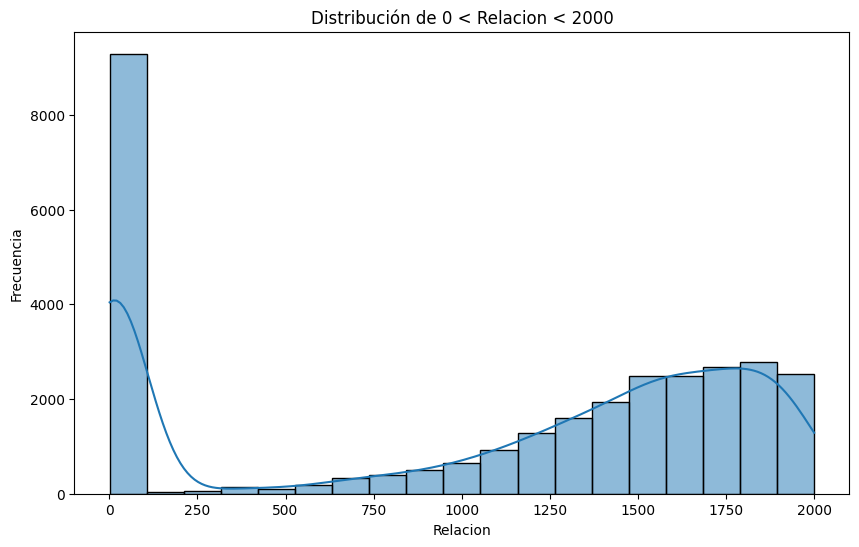

In [37]:
cota(df=df, col="Relacion", ls=2000)

Relacion: (1922, 20)


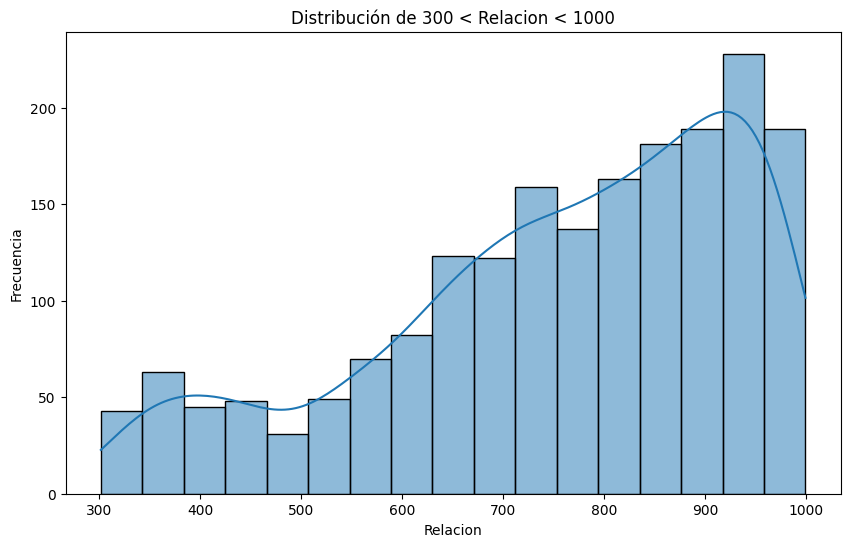

In [38]:
cota(df=df, col="Relacion", li=300, ls=1000)

Precio: (8961, 20)


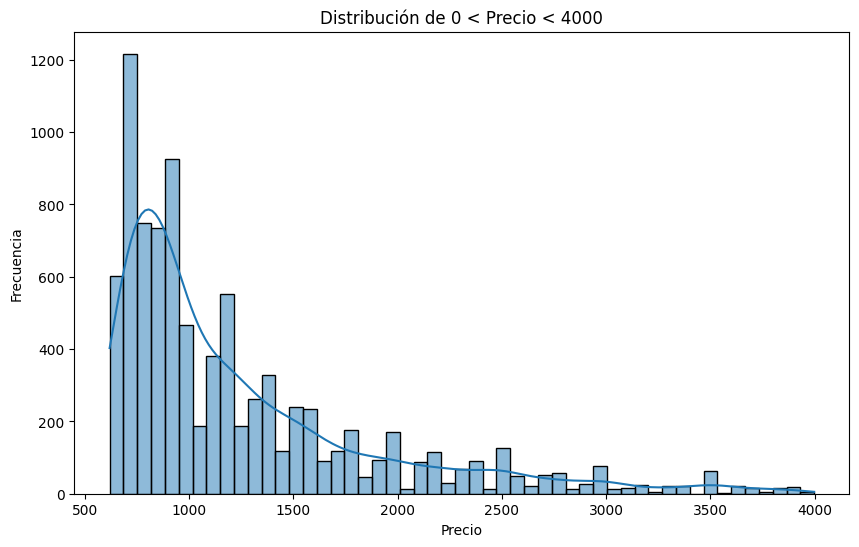

In [39]:
cota(df=df, col="Precio", li=0, ls=4000)

Precio: (398, 20)


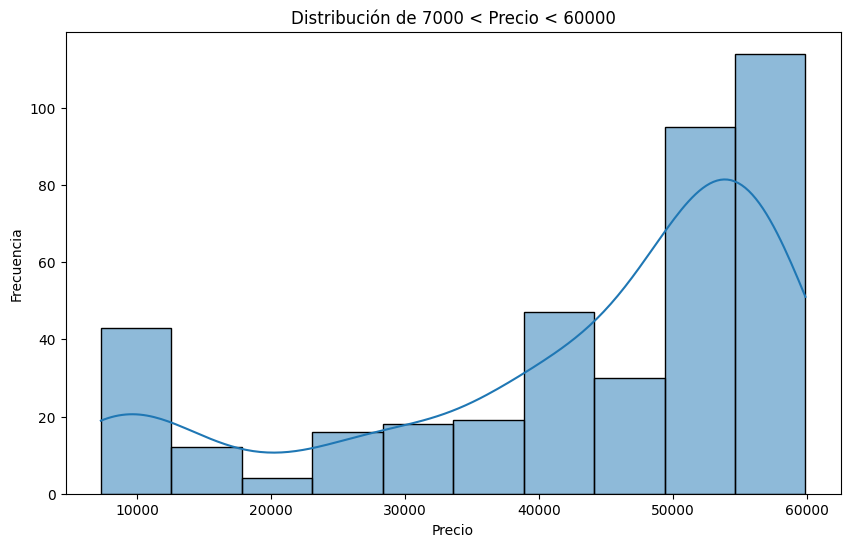

In [40]:
cota(df=df, col="Precio", li=7000, ls=60000)

Es importante tener en cuenta que estos datos pueden corresponder a datos de alquiler en lugar de a venta de viviendas. Esto se debe a que un precio inferior a 50€ el metro cuadrado es imposible en la Comunidad de Madrid para ningún tipo de propiedad, y de hecho podemos ver que la mayoría de estos son pisos o apartamentos, lo que lo hace aún más extraño. Por todo ello podría ser una opción a tener en cuenta la de eliminar estos registros de nuestro dataframe, aunque con ello estaríamos eliminando casi una sexta parte del total de nuestros datos, lo que tendría un impacto más que considerable en nuestro análisis.


La idea es establecer un umbral que, aún no pudiendo tener una eficacia del 100% debido a que en la Comunidad de Madrid puede haber alquileres superiores a lo que pueda llegar a costar una vivienda, encaje con los datos visualizados anteriormente de forma que nuestro dato quede lo más coherente posible, eliminando el menor número de ofertas de venta posible, y a su vez manteniendo el menor número de ofertas de alquiler posible.


Para determinar si eliminamos o no aquellos datos con una relación de valor del metro cuadrado muy baja, se ha seguido un criterio experto, tomando como referencia el precio mínimo del metro cuadrado en la Comunidad de Madrid según el portal de vivienda "Idealista". En este se sitúa dicho mínimo en el municipio de Fuentidueña de Tajo, con una relación de 854€/m2. Sobre este daremos un margen de error del 10% por la posible variación del precio en los años que distan nuestros datos de la referencia, por lo que estableceremos nuestro umbral en 770€/m2.

In [41]:
df = df[df["Relacion"] > 770]

Seleccionamos finalmente aquellas variables que nos ofrecen información útil y no redundante para tenerlas en cuenta a la hora de realizar nuestro estudio y desarrollar nuestros modelos. Un ejemplo de variables que no ofrecen información útil podrían ser "CodigoPostal", "CMUN", "CCA" etc, ya que todas ellas son redundantes con "CUDIS". Lo mismo pasa con la información referente al cliente o la variable "Inmueble", que solo toma un único valor para esta comunidad.

In [42]:
df_clean = df[['Año', 'Mes', 'Dia', 'Caracteristicas', 'Habitaciones', 'Aseos', 'Terraza', 'Piscina', 'Garaje', 'CUDIS', 
          'Latitud', 'Longitud', 'Metros', 'euribor', 'numero_hipotecas', 'ipc', 'tipo_interes', 'paro', 'Precio']]

In [43]:
# Verificamos los tipos de datos de las columnas
print(df.dtypes)

Año                   int32
Mes                   int32
Dia                   int32
Caracteristicas       int64
Habitaciones          int64
Aseos                 int64
Terraza               int64
Piscina               int64
Garaje                int64
CUDIS                 int64
Latitud             float64
Longitud            float64
Metros              float64
Relacion            float64
euribor             float64
numero_hipotecas    float64
ipc                 float64
tipo_interes        float64
paro                float64
Precio              float64
dtype: object


# VISUALIZACIÓN DE DATOS

En primer lugar, vamos a visualizar de forma genérica nuestro dataframe definitivo una vez llevados a cabo todos los procesos de limpieza.

In [44]:
df = df_clean
print(df_clean.shape)
df_clean.head(10)

(51585, 19)


,Año,Mes,Dia,Caracteristicas,Habitaciones,Aseos,Terraza,Piscina,Garaje,CUDIS,Latitud,Longitud,Metros,euribor,numero_hipotecas,ipc,tipo_interes,paro,Precio
0,2022,1,28,3,3,1,1,0,0,2801302,40.03230,-3.590442,93.0,-0.4767,8.0,5.6,1.85,10.68,99000.0
1,2022,1,28,3,3,1,0,0,0,2800501,40.48885,-3.363883,79.0,-0.4767,8.0,5.6,1.85,10.68,175285.0
2,2022,1,28,3,3,2,0,0,0,2807906,40.45979,-3.697679,92.0,-0.4767,8.0,5.6,1.85,10.68,359000.0
3,2022,1,28,3,4,2,1,0,0,2807910,40.38403,-3.753878,108.0,-0.4767,8.0,5.6,1.85,10.68,192000.0
4,2022,1,28,3,3,1,1,0,0,2807912,40.38203,-3.707577,77.0,-0.4767,8.0,5.6,1.85,10.68,139000.0
5,2022,1,28,3,4,2,0,0,0,2807907,40.42882,-3.700875,145.0,-0.4767,8.0,5.6,1.85,10.68,614000.0
6,2022,1,28,3,3,1,0,0,0,2805802,40.28749,-3.786191,89.0,-0.4767,8.0,5.6,1.85,10.68,149000.0
7,2022,1,28,2,3,2,0,0,0,2816101,40.18841,-3.680244,100.0,-0.4767,8.0,5.6,1.85,10.68,157000.0
8,2022,1,28,3,3,2,0,0,0,2807912,40.36584,-3.710928,130.0,-0.4767,8.0,5.6,1.85,10.68,228000.0
9,2022,1,28,1,5,2,0,0,0,2803801,40.73841,-4.060768,393.0,-0.4767,8.0,5.6,1.85,10.68,360000.0


Vamos ahora a ver un resumen con los puntos de interés más relevantes para cada una de las variables, a modo de descripción de su estado final.

In [45]:
df_numericas = df.select_dtypes(include=['number'])
columnas = ['Variable', 'Maximo', 'Minimo', 'Media', 'Moda', 'Varianza', 'Desviacion Tipica', 'Quantil 1', 'Quantil 2', 'Quantil 3']
resumen = pd.DataFrame(columns=columnas)

for columna in df_numericas.columns:
    row = pd.DataFrame({
        'Variable': [columna],
        'Maximo': [round(df[columna].max(), 2)],
        'Minimo': [round(df[columna].min(), 2)],
        'Media': [round(df[columna].mean(), 2)],
        'Moda': [round(df[columna].mode()[0], 2)],
        'Varianza': [round(df[columna].var(), 2)],
        'Desviacion Tipica': [round(df[columna].std(), 2)],
        'Quantil 1': [round(df[columna].quantile(0.25), 2)],
        'Quantil 2': [round(df[columna].quantile(0.5), 2)],
        'Quantil 3': [round(df[columna].quantile(0.75), 2)],
        'Kurtosis': [round(df[columna].kurtosis(), 2)]
    })
    
    resumen = pd.concat([resumen, row], ignore_index=True)
    
resumen

,Variable,Maximo,Minimo,Media,Moda,Varianza,Desviacion Tipica,Quantil 1,Quantil 2,Quantil 3,Kurtosis
0,Año,2022,2021,2021.11,2021,1.000000e-01,0.31,2021.00,2021.00,2021.00,4.10
1,Mes,12,1,8.61,9,8.170000e+00,2.86,9.00,9.00,9.00,2.82
2,Dia,31,1,11.99,8,5.468000e+01,7.39,8.00,8.00,15.00,0.15
3,Caracteristicas,10,1,3.21,3,2.030000e+00,1.42,3.00,3.00,3.00,5.83
4,Habitaciones,10,1,2.97,3,1.560000e+00,1.25,2.00,3.00,3.00,2.78
5,Aseos,8,1,1.89,1,1.300000e+00,1.14,1.00,2.00,2.00,3.83
6,Terraza,1,0,0.43,0,2.500000e-01,0.50,0.00,0.00,1.00,-1.93
7,Piscina,1,0,0.14,0,1.200000e-01,0.35,0.00,0.00,0.00,2.33
8,Garaje,1,0,0.11,0,1.000000e-01,0.31,0.00,0.00,0.00,4.27
9,CUDIS,2890301,2800101,2808374.79,2807901,3.504784e+07,5920.12,2807901.00,2807910.00,2808301.00,111.94


A continuación realizaremos una serie de visualizaciones para determinar la distribución de nuestros datos a lo largo de las principales variables de estudio:

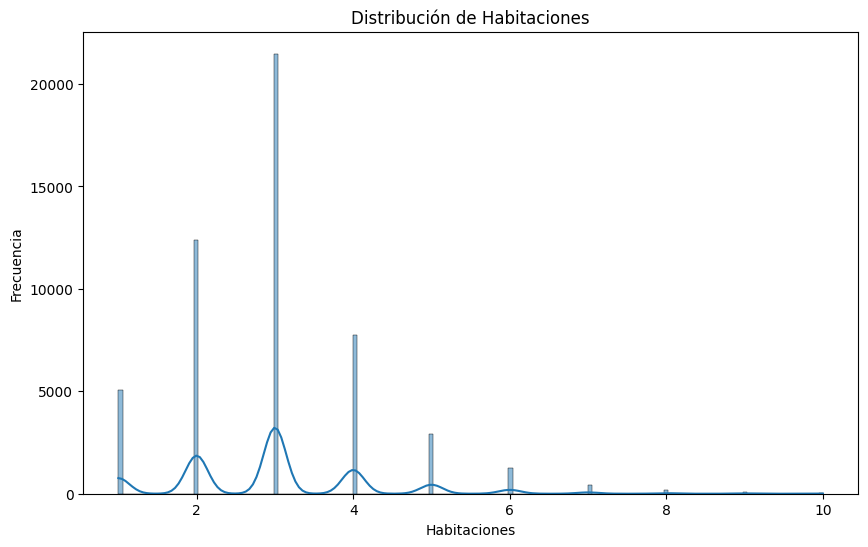

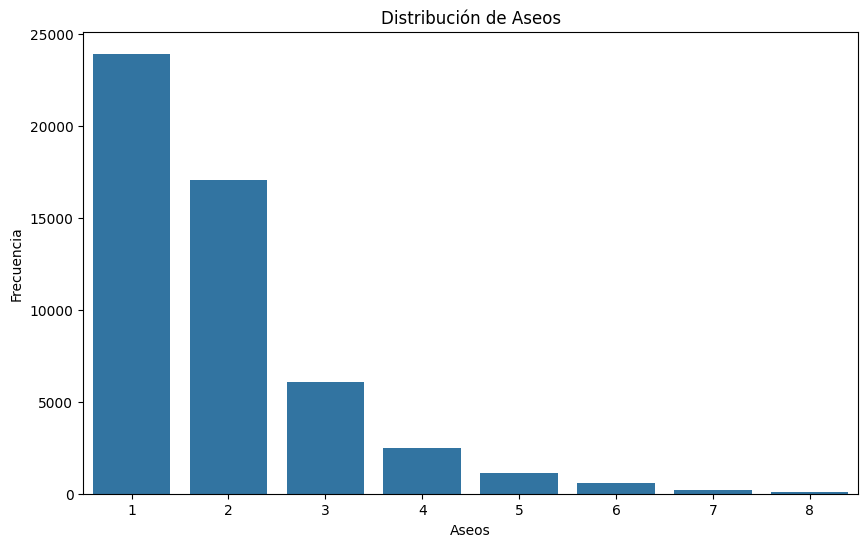

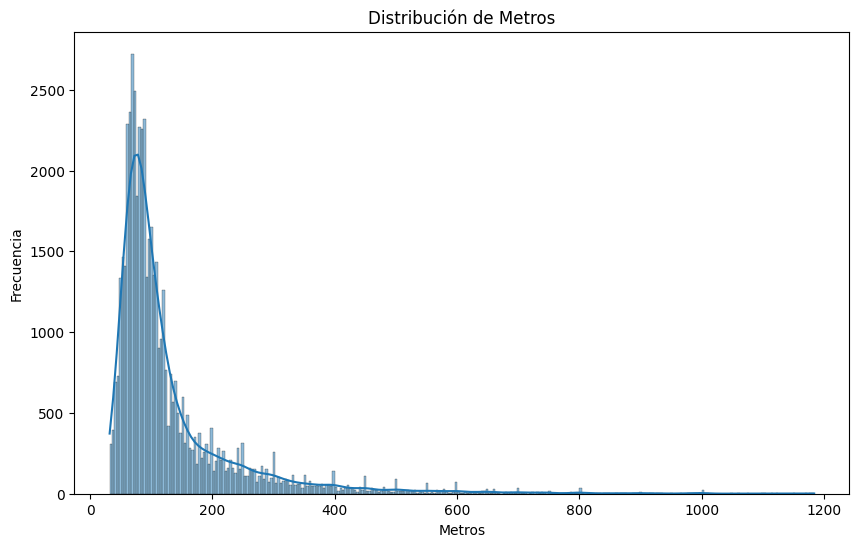

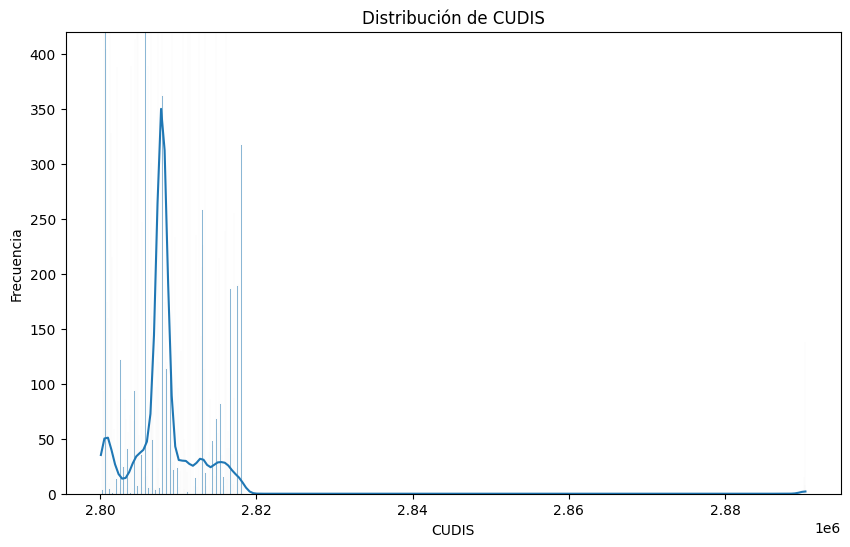

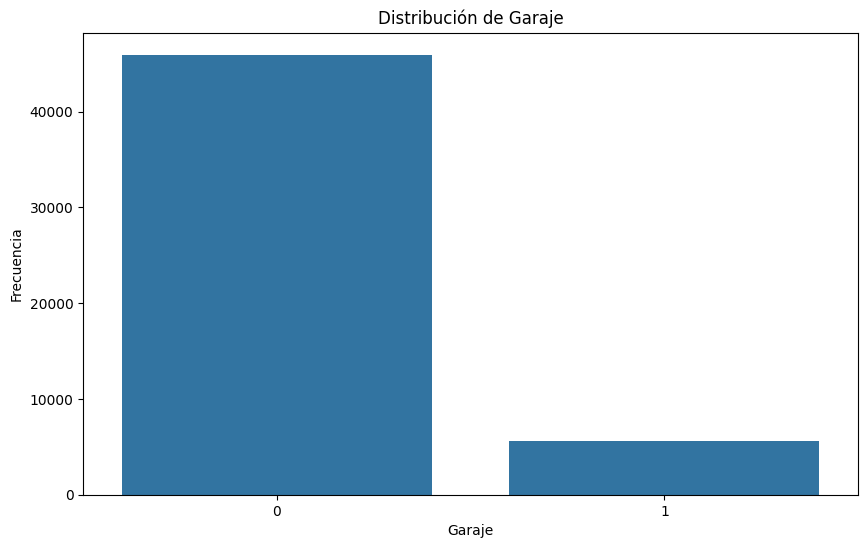

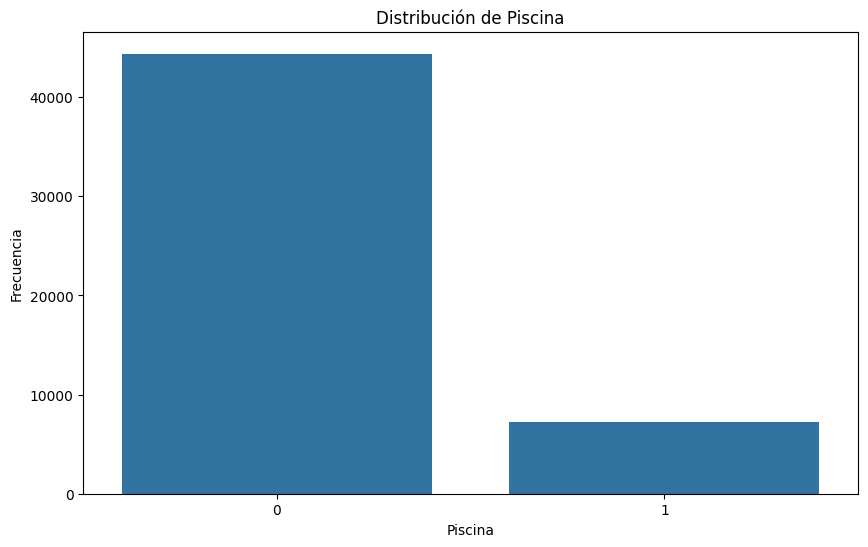

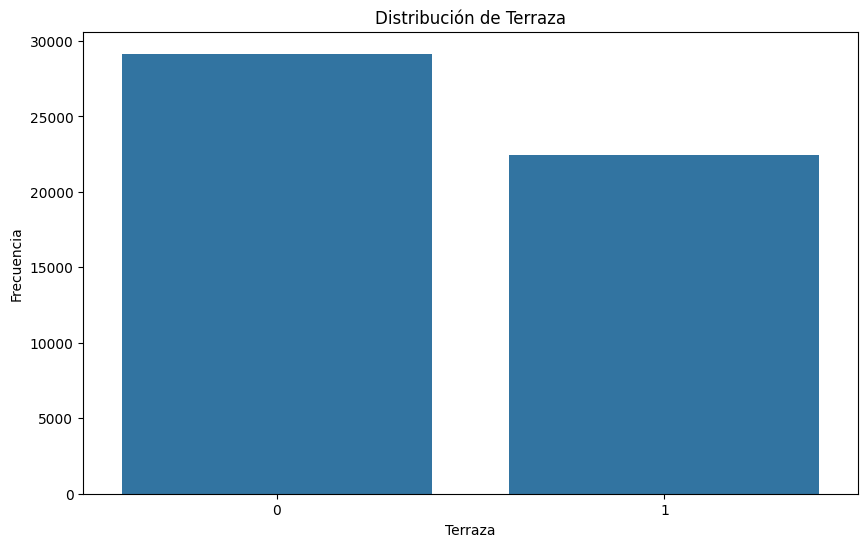

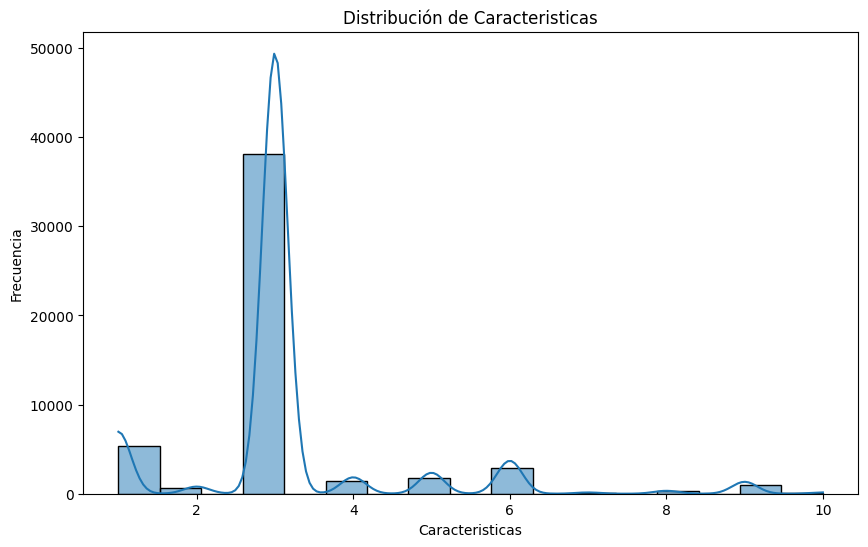

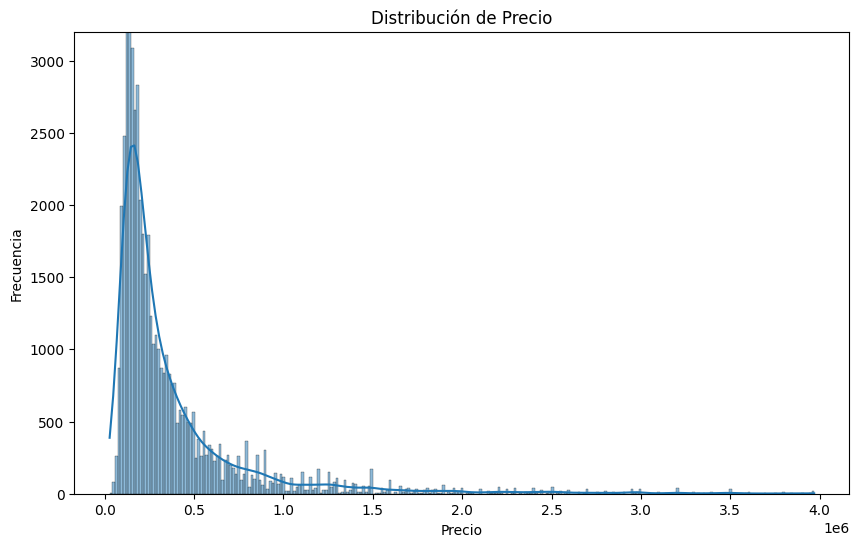

In [46]:
# Seleccionamos algunas variables clave para visualización
variables_clave = ['Habitaciones', 'Aseos', 'Metros', 'CUDIS', 'Garaje', 
                   'Piscina', 'Terraza', 'Caracteristicas', 'Precio']

# Creamos visualizaciones para las variables clave
for columna in variables_clave:
    plt.figure(figsize=(10, 6))
    # Diferenciar entre variables categóricas y numéricas
    if df[columna].dtype == 'object' or len(df[columna].unique()) < 10:
        sns.countplot(x=columna, data=df)
    else:
        sns.histplot(df[columna], kde=True)
    
    if columna == 'Precio':
        plt.ylim(0, 3200)  # Establece el límite del eje y
    if columna == 'CUDIS':
        plt.ylim(0, 420)  # Establece el límite del eje y
    plt.title(f'Distribución de {columna}')
    plt.ylabel('Frecuencia')
    plt.xlabel(columna)
    plt.show()

Procedemos ahora a comentar los resultados obtenidos de las visualizaciones:
    
- Habitaciones:
        
Podemos observar que el valor más repetido son 3 habitaciones, seguido de 2 y 4. Finalmente también podemos encontrar bastantes viviendas con 1 y 5 habitaciones, mientras que las de 6, y especialmente las de 7, son prácticamente residuales. La media de habitaciones estará en 2.9 mientras que la moda se situará en 3.
        
- Aseos:
        
Siendo lo más común encontrar viviendas con un aseo, seguido relativamente de cerca por las de dos, a medida que aumentamos el número de aseos cada vez resulta en situaciones más difíciles de encontrar. La media de aseos es 1.83 mientras que la moda es 1, vislumbrando esto que es mucho menos común comprar una casa que cuente con varios aseos que comprar una casa con múltiples habitaciones. 
    
- Metros:

Podemos ver como la mayoría de valores se sitúa entre 70 y 140 aproximadamente, siendo la media 124.73 y la moda 80. A partir de 140 la distribución de los metros va disminuyendo hasta alcanzar los valores más altos que apenas son residuales.

- Distritos (CUDIS):

Podemos ver que prácticamente todos se distribuyen entre los que empiezan por 280 y los que empiezan por 281, esto tiene una explicación sencilla y encaja con los valores esperados puesto que estos códigos de distrito son los que pertenecen a la capital y los grandes pueblos cercanos de alrededor.

- Garaje:

La proporción de las casas que cuenta con garaje apenas llega al 5%, haciendo de esta condición algo realmente extraño.

- Piscina:

Tener piscina también será una condición similarmente extraña para una vivienda en venta, aunque puede sorprender que es más común que el hecho de tener garaje. La media de la variable piscina se encuentra en 0.13 frente al 0.11 de la variable garaje, por lo que definitivamente se venden más viviendas con piscina que con garaje.
    
- Terraza:

Tener terraza, por el contrario, no es una condición tan inusual como pudiera parecer en un principio. La media de esta variable se sitúa en 0.43, lo que nos indica que casi la mitad de las viviendas en venta contarán con terraza.

- Características:

En esta gráfica podemos ver como el valor más repetido con muchísima diferencia es el que referencia a los pisos, lo cual tiene mucho sentido en un lugar como la Comunidad de Madrid que concentra la mayoría de su población en la capital, donde lo más común es vivir en un piso. A este valor le siguen, aunque muy alejados, el valor que referencia a los chalets y el que referencia a los duplex.

- Precio:

Como podemos observar, nuestra variable objetivo concentra la mayoría de sus datos en los primeros valores del gráfico. Teniendo una media de 383200.85 y siendo los 185000 euros la moda, podemos decir que la mayoría de las viviendas se concentra en valores entre 100000 y 400000, siendo los valores superiores a estos cada vez más escasos hasta acabar siendo prácticamente residuales. Es reseñable destacar que la distribución de la gráfica de la variable objetivo guarda muchas similitudes con las gráficas obtenidas para Aseos, Habitaciones y Metros, por lo que es de esperar que este muy relacionada con estas.
    

Adicionalmente, vamos a determinar la distribución de nuestros datos en base a la ubicación de las viviendas.

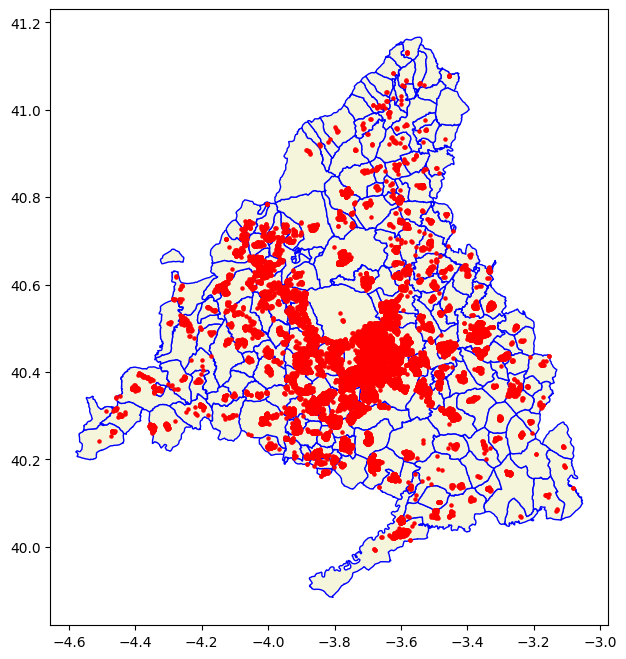

In [47]:
# Leemos el shapefile para el mapa base
mapa_base = gpd.read_file('./resources/municipios.shp')

# Establecemos el CRS del mapa base manualmente si es None
if mapa_base.crs is None:
    mapa_base.set_crs(epsg=25830, inplace=True)  # Ajustar según el CRS correcto del shapefile

# Transformamos el CRS del mapa base a EPSG:4326 (coordenadas geográficas)
mapa_base = mapa_base.to_crs(epsg=4326)

# Creamos un GeoDataFrame a partir de los datos
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.Longitud, df.Latitud))
gdf.set_crs(epsg=4326, inplace=True)  # Asegurarse de que gdf esté en EPSG:4326

# Creamos una figura y un objeto Axes
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Representamos el mapa base
mapa_base.plot(ax=ax, color='beige', edgecolor='blue')

# Representamos los puntos sobre el mapa base
gdf.plot(ax=ax, marker='o', color='red', markersize=5)

# Mostramos la figura
plt.show()

Se vislumbra claramente que la distribución de las viviendas en venta responde a lo esperado. La mayoría de estas se concentra en la capital y sus alrededores, coincidiendo estos puntos con aquellos que más población concentran y, por lo tanto, que tendrán mayor densidad de viviendas y con esto más probabilidades de tener también una mayor oferta en cuanto a la venta de estas se refiere.

Aparte de la gran concentración de la capital podemos ver como los municipios más grandes de la comunidad acaparan una mayor densidad de las viviendas en venta, mientras que los pequeños pueblos, tanto en la sierra del norte como los que colindan con Castilla la Mancha al sur, tendrán una densidad de ofertas notablemente menor.

Finalmente, estudiaremos la correlación entre las diferentes variables para determinar aquellas que, a priori, tendrán más peso en nuestro estudio.

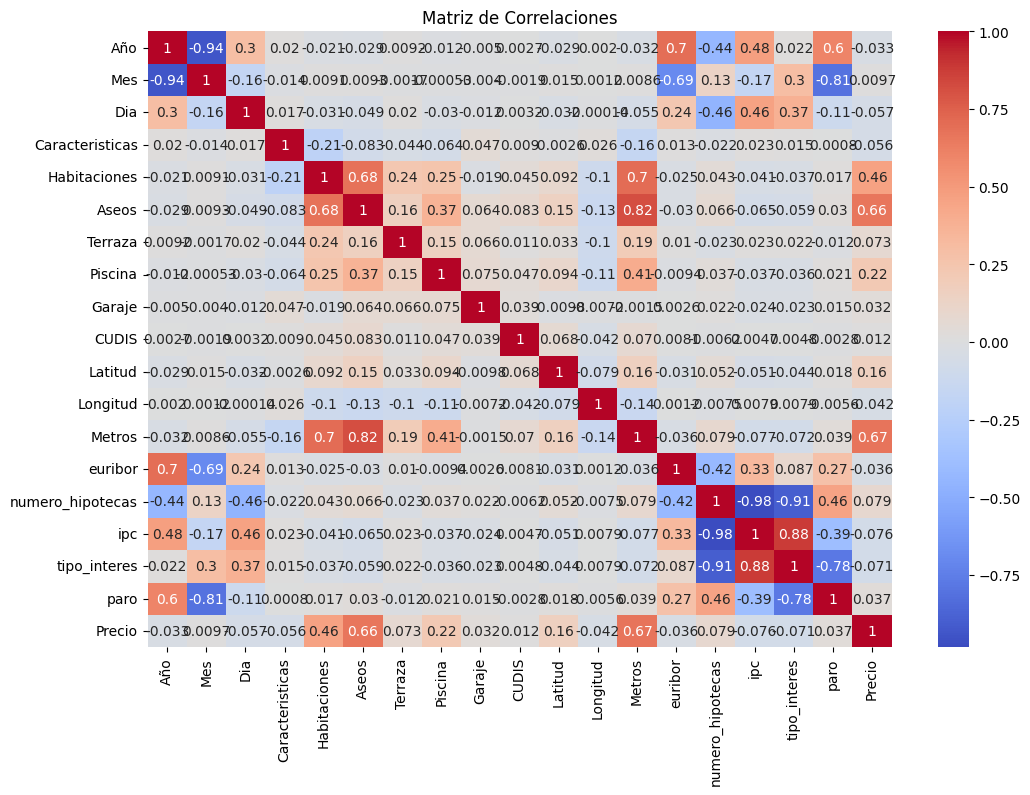

In [48]:
# Creamos la matriz de correlaciones
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlaciones')
plt.show()

Como podemos ver, la variable a priori más relacionada con el precio será la cantidad de
metros cuadrados, lo cual entraría dentro de lo esperado.
La segunda variable más relacionada con el precio, prácticamente al mismo nivel que la
primera, será el número de aseos. Esto puede tener sentido desde el enfoque de que para
construir una casa con muchos aseos, suele ser indispensable que cuente ya con un número
considerable de habitaciones y metros.
La tercera variable más relacionada con el precio será el número de habitaciones y, por
último, la cuarta más relacionada aunque en muchísima menor medida que las anteriores
será el hecho de tener piscina o no.
Un hecho remarcable es que la quinta sería la Latitud, y es que es popularmente conocido
que en Madrid los distritos más caros tienden a estar
 al norte.
Finalmente, cabe destacar que las variables añadidas que hacen referencia a la situación
económica estarán muy relacionadas entre sí, tanto de forma directa como inversamente.
Sin embargo, en esta primera aproximación que podemos ver en la matriz de correlaciones,
no parece que estén aparentemente relacionadas con la vari
able objetivo.
No obstante, vamos a calcular el Factor de Inflación de la Varianza (VIF), el cual es una
medida que se utiliza para detectar la multicolinealidad en un conjunto de variables
predictoras en modelos de regresión. La idea detrás del VIF es cuantificar cuánto se infla la
varianza de un coeficiente de regresión debido a la multicolinealidad. La multicolinealidad
ocurre en un análisis de regresión cuando dos o más variables independientes están
altamente correlacionadas entre sí. Esto significa que una variable independiente puede
predecirse desde las otras con un alto grado de precisión. Una alta multicolinealidad puede
producir aumentos en los tiempos de entrenamiento, así como resultados erróneos, sobre
todo en los modelos basados en árboles. 

In [49]:
def vif(df):
    # Calculamos el VIF para cada variable
    vif_data = pd.DataFrame()
    vif_data['feature'] = df.columns
    
    # Aquí calculamos el VIF para cada característica
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    
    return vif_data

In [50]:
vif(df_clean)

,feature,VIF
0,Año,inf
1,Mes,inf
2,Dia,1.289323
3,Caracteristicas,1.066121
4,Habitaciones,2.251426
5,Aseos,3.708820
6,Terraza,1.088883
7,Piscina,1.243464
8,Garaje,1.031044
9,CUDIS,1.017186


Al calcular el VIF se aprecia que existe una multicolinealidad perfecta entre las variables
económicas, por lo que vamos a combinar estas en dos variables PCA. Para esto, en primer
lugar, escalamos los datos y calculamos el porcentaje de varianza que se explica con
nuestras PCA, siendo este un 92,9%, lo cual es un muy buen resultado. Dentro de este un
65,85% vendrá explicado por la primera componente y un 27,05% por la segunda, por lo que
decidimos añadir las dos. Una vez añadidas, el antes y después del VIF queda como se
muestra a continuación:

In [51]:
features = ["euribor", "numero_hipotecas", "ipc", "tipo_interes", "paro"]
X = df_clean[features]

# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creamos el objeto PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)
print("Varianza total explicada:", sum(pca.explained_variance_ratio_))

Varianza explicada por cada componente: [0.65851501 0.27052098]
Varianza total explicada: 0.9290359882099599


In [52]:
df_clean['PCA1'] = X_pca[:, 0]
df_clean['PCA2'] = X_pca[:, 1]
df = df_clean[['Año', 'Mes', 'Dia', 'Caracteristicas', 'Habitaciones', 'Aseos', 'Terraza', 'Piscina', 'Garaje', 'CUDIS', 
          'Latitud', 'Longitud', 'Metros', 'PCA1', 'PCA2', 'Precio']]

vif(df)

,feature,VIF
0,Año,322491.114999
1,Mes,94.201712
2,Dia,1.289259
3,Caracteristicas,1.066117
4,Habitaciones,2.251408
5,Aseos,3.708478
6,Terraza,1.088787
7,Piscina,1.243448
8,Garaje,1.030892
9,CUDIS,1.017126


In [53]:
df.shape

(51585, 16)

In [54]:
df.to_csv('./DatosViviendas.csv', index=False)

Como podemos ver, dado que para que exista una multicolinealidad alta debemos tener un
VIF de al menos 5, podremos concluir que habremos resuelto el problema que teníamos en
todas nuestras variables con la única excepción de la fecha, que a pesar de estar muy
relacionada con las nuevas variables PCA, no debería dar problemas. Aparte de esto, nunca
tuvimos problemas de multicolinealidad con la variable objetivo Precio, por lo que podemos
dar nuestro conjunto con 51585 filas y las 16 columnas que se ven en la figura 10, por
preparado para el entrenamiento de los modelos.